<a href="https://colab.research.google.com/github/souptikmajumder/Australian-home-market/blob/master/Surprise_Housing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


import os

import warnings
warnings.filterwarnings('ignore')

In [0]:
df= pd.read_csv('train.csv')

In [0]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df.shape #1460 rows and 81 columns of training_dataset

(1460, 81)

In [0]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [0]:
#Since, it is difficult to find which columns have non zero null values from 81 columns, so filtering out columns with non 
#zero null values

In [0]:
null_f= round(df.isna().sum()/len(df) *100,2).nonzero() #column number containing null values

In [0]:
print(df.columns[null_f]) # 19 columns out of 81 columns have null values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


19 columns mentioned above have null values. 

In [0]:
df[df.columns[null_f]].dtypes # Types of elements in the columns having null values

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

Let's separate columns with null values into two categories such that one set of columns have numeric datatypes and other have non-numeric datatypes

In [0]:
num_nulls=['LotFrontage','MasVnrArea','GarageYrBlt'] #list of numeric null type columns
cat_nulls=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
          'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
        #list of categorical columns with null values


In [0]:
round(df[num_nulls].isna().sum()/len(df) *100 ,2) #percentage of missing values in numerical columns

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [0]:
#Since,we have missing values in numerical columns we can replace them with median. 

In [0]:
df[num_nulls]=df[num_nulls].fillna(df[num_nulls].median())

In [0]:
round(df[cat_nulls].isna().sum()/len(df) *100 ,2) #percentage of missing values in categorical columns

Alley           93.77
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

Since ,we have columns like `Alley`,`PoolQC`,`Fence`,`MiscFeature` with high percentage of missing values, greater than `50%` , we can drop these columns.

In [0]:
df=df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1) #dropping categorical columns with high null values

In [0]:
cat_null_set=set(cat_nulls)-set(['Alley','PoolQC','Fence','MiscFeature']) #final set of null categorical columns

In [0]:
cat_nulls= list(cat_null_set) #final list of null categorical columns

In [0]:
df[cat_nulls]=df[cat_nulls].replace(np.nan,df[cat_nulls].mode())  # replacing null categorical values with mode

In [0]:
df.isna().sum(axis=1).nonzero() # We have replaced all the null values in columns 

(array([], dtype=int64),)

In [0]:
df.isna().sum(axis=0).nonzero() # We have replaced all the null values in rows

(array([], dtype=int64),)

Shape of the final DataFrame without Null Values:

In [0]:
df.shape # 77 columns and 1460 rows of the original data is retained after null value treatment

(1460, 77)

### Outlier Analysis

In [0]:
df= df.drop(columns=['Id'],axis=1) #Id is a insignificant column and seems to be insignificant for analysis 

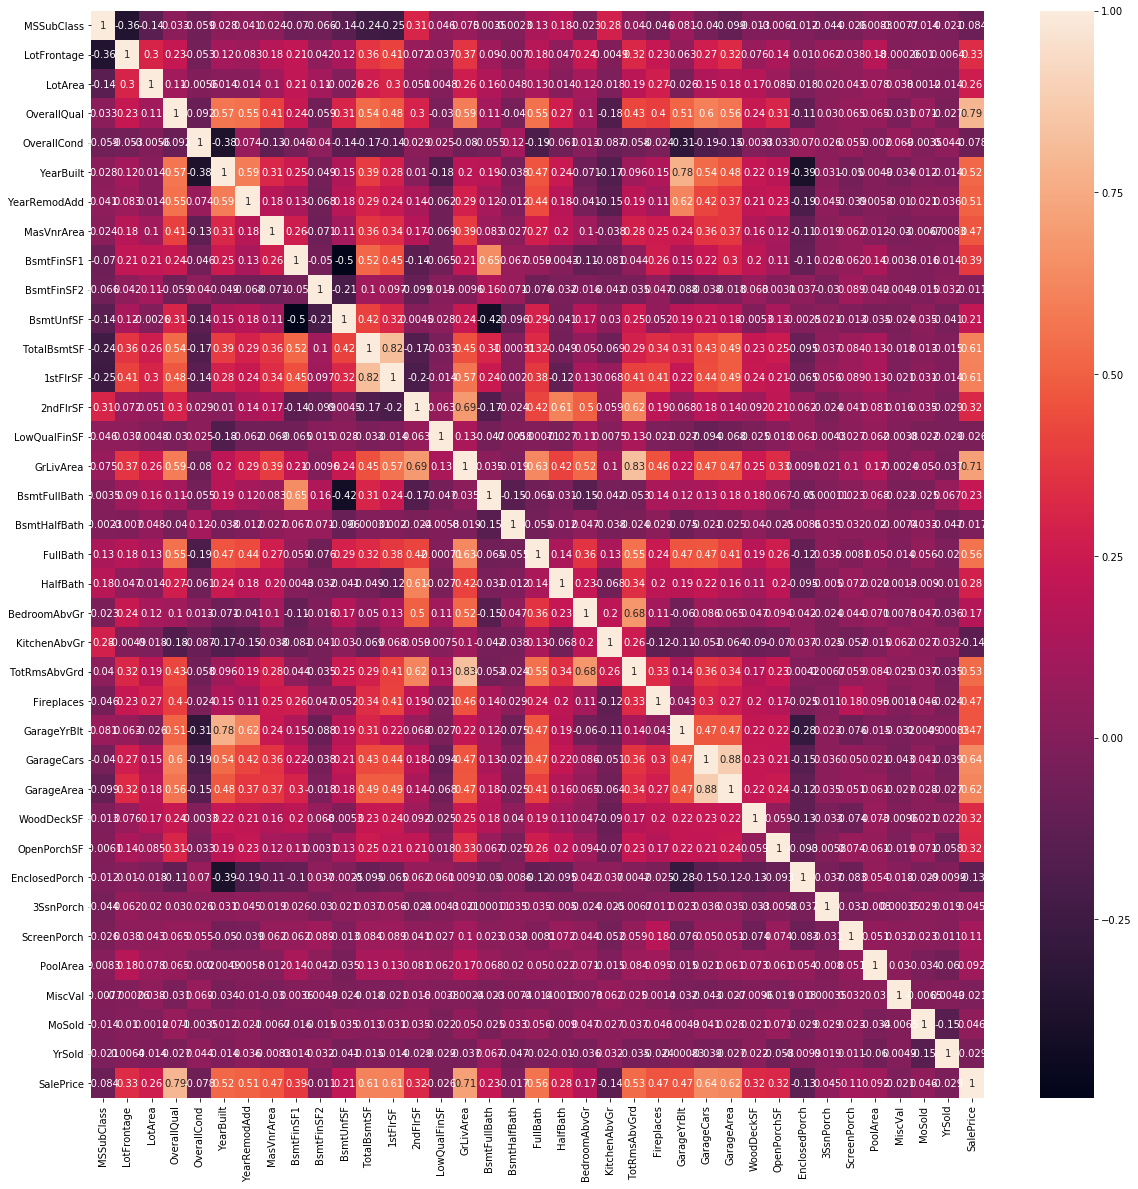

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see that most of the columns like `OverallQual`,`TotalBsmtSF`,`1stFlrSF`,`GarageArea` are highly correlated with the SalePrice of the House.

<b>So, we can take an approach of outlier treatment and required transformations for only such columns which are significant and highly correlated with the `Sale Price` of the house.</b>

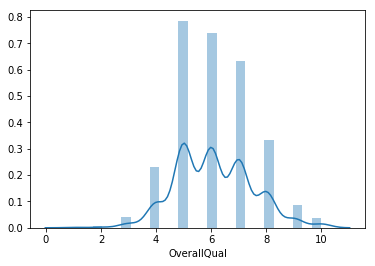

In [0]:
sns.distplot(df['OverallQual'])
plt.show()

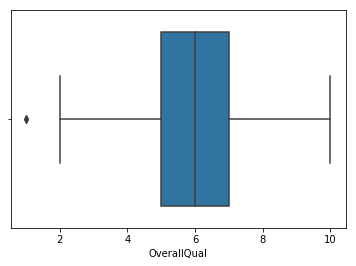

In [0]:
sns.boxplot(df['OverallQual']) #Outliers for column Overall Quality
plt.show()

In [0]:
df= df[(df['OverallQual']>=df['OverallQual'].quantile(0.03) )]  #removing the outliers

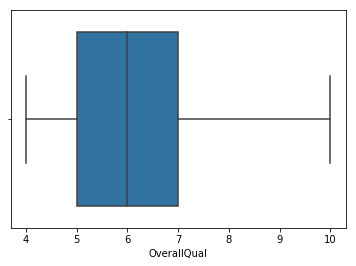

In [0]:
sns.boxplot(df['OverallQual']) #considering the values which are higher than 3 percentile
plt.show()

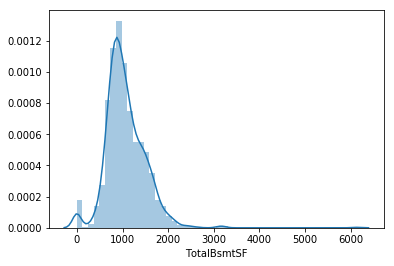

In [0]:
sns.distplot(df['TotalBsmtSF']) #distplot for total square feet of base area
plt.show()

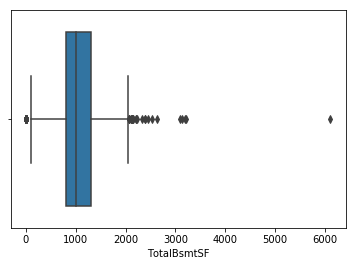

In [0]:
sns.boxplot(df['TotalBsmtSF'])
plt.show()

In [0]:
df= df[(df['TotalBsmtSF']>=df['TotalBsmtSF'].quantile(0.03) ) & (df['TotalBsmtSF']<=df['TotalBsmtSF'].quantile(0.98) ) ]  #removing the outliers

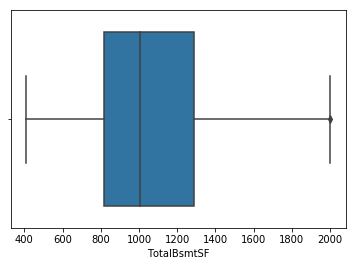

In [0]:
sns.boxplot(df['TotalBsmtSF']) #considering area within 3 percentile and 98 percentile of the data
plt.show()

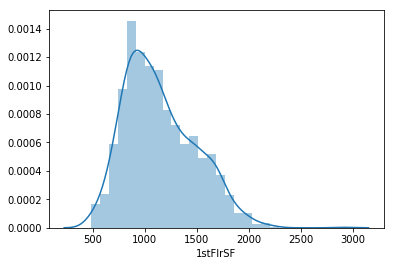

In [0]:
sns.distplot(df['1stFlrSF'])
plt.show()

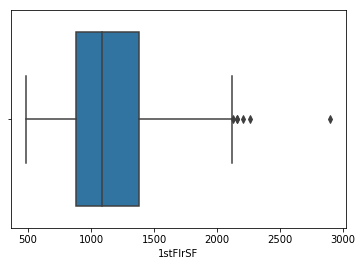

In [0]:
sns.boxplot(df['1stFlrSF'])
plt.show()

In [0]:
df= df[(df['1stFlrSF']<=df['1stFlrSF'].quantile(0.99) ) ]  #removing the outliers

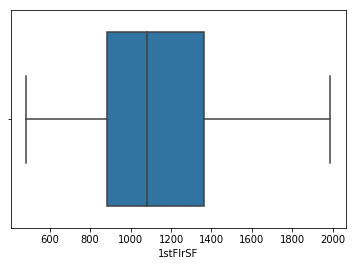

In [0]:
sns.boxplot(df['1stFlrSF']) #removing the values greater than 99 percentile to remove the outliers
plt.show()

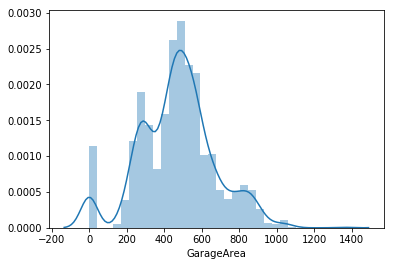

In [0]:
sns.distplot(df['GarageArea']) 
plt.show()

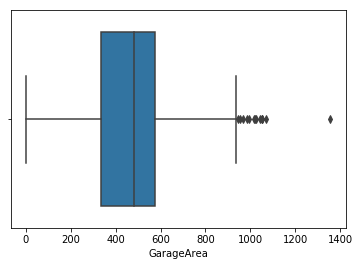

In [0]:
sns.boxplot(df['GarageArea'])
plt.show()

In [0]:
df= df[(df['GarageArea']<=df['GarageArea'].quantile(0.99) ) ]  #removing the outliers

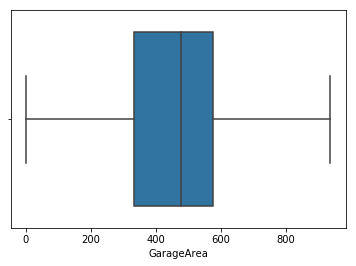

In [0]:
sns.boxplot(df['GarageArea'])
plt.show()

In [0]:
df.shape #rows and column of final dataframe after removing the outliers

(1334, 76)

<b>Here, we have done outlier analysis for the most correlated variables with the SalePrice of the house.</b>

Also, we have retained about 93% of the original data.

In [0]:
df_cat_cols=df.select_dtypes(include='O')

### Dummy Variables

In [0]:
category_dummies=pd.get_dummies(df_cat_cols,drop_first=True)
category_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [0]:
# drop categorical variables 
df = df.drop(list(df_cat_cols.columns), axis=1)

In [0]:
# concat dummy variables with df
df = pd.concat([df, category_dummies], axis=1)

In [0]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [0]:
df.shape # shape of dataframe after adding dummy_variables

(1334, 230)

### Scaling of Data

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(df) #array with standardised and scaled values


In [0]:
scaled_df=pd.DataFrame(scaled_arr) #converting the scaled array to dataframe

In [0]:
scaled_df.columns = df.columns #renaming the columns as the original dataframe df 

In [0]:
scaled_df.head() #scaled dataframe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.059278,-0.198864,-0.208036,0.701232,-0.565169,1.042646,0.876983,0.581944,0.640542,-0.2934,...,-0.061337,-0.054841,-0.289261,-0.047476,0.378288,-0.047476,-0.077674,-0.120203,0.454036,-0.293801
1,-0.883523,0.550528,-0.072394,-0.096248,2.196501,0.147181,-0.447149,-0.581419,1.298459,-0.2934,...,-0.061337,-0.054841,-0.289261,-0.047476,0.378288,-0.047476,-0.077674,-0.120203,0.454036,-0.293801
2,0.059278,-0.048986,0.122223,0.701232,-0.565169,0.976315,0.827941,0.380136,0.108404,-0.2934,...,-0.061337,-0.054841,-0.289261,-0.047476,0.378288,-0.047476,-0.077674,-0.120203,0.454036,-0.293801
3,0.294979,-0.448662,-0.078291,0.701232,-0.565169,-1.875908,-0.741401,-0.581419,-0.544675,-0.2934,...,-0.061337,-0.054841,-0.289261,-0.047476,0.378288,-0.047476,-0.077674,-0.120203,-2.202471,-0.293801
4,0.059278,0.750366,0.477251,1.498712,-0.565169,0.943150,0.729857,1.496015,0.517183,-0.2934,...,-0.061337,-0.054841,-0.289261,-0.047476,0.378288,-0.047476,-0.077674,-0.120203,0.454036,-0.293801


In [0]:
#Separating the columns into dependent and independent Variables

In [0]:
y = scaled_df['SalePrice']
X = scaled_df.drop(columns=['SalePrice'],axis=1)

In [0]:
# split into train and test with ratio of 80% and 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

In [0]:
X_train.shape #shape of train data

(1067, 229)

In [0]:
X_test.shape #shape of test data

(267, 229)

### RFE

Since, we have higher number of parameters , we can use Recursive Feature Elimination to extract most relevant
and important variables amongst these.

In [0]:
from sklearn.feature_selection import RFECV #using RFE and cross validation together to extract the best of the features

In [0]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfecv = RFECV(lm,min_features_to_select=5,cv=5)             # running RFE and 5 fold cross validation
rfecv = rfecv.fit(X_train, y_train)

In [0]:
rfecv.ranking_

array([  1,  65,   1,   1,   1,   1,  73,   1,   1,   6,   8,   1,   1,
         1,   1,   1,   1, 139, 183, 178, 146, 130,  92, 161, 195,   1,
        39,  34,  69, 179, 101, 104, 166, 169,  91, 126,  31,  45,  41,
        42, 131, 148, 172, 191, 124,  90, 174, 122,  38, 100, 176, 175,
       167,  37, 184, 145, 133,  59,  64,   1,  61,  66, 171,  70,  51,
        49, 135,  50,   1,   1,  60, 186,  63,  67,  68,  32,  62, 144,
       119,  33, 113, 114,  48, 120, 197, 121, 177, 125, 118,  56, 189,
       142, 188,  17, 109, 134,  84,  83,  86, 196, 173,  52,  58,  19,
       143,  18, 132,  57,  55,  25, 202, 164, 149, 199,  97,  35,   2,
        72, 102,  16, 111, 141, 192,  95, 140,  26, 107,  20, 185, 112,
         3,  71, 103, 159,  74, 198, 160, 157,  94,  46,  27, 108,   1,
         1,   1,  40,   1,   1,  82, 168, 123, 117, 116, 170,  99, 165,
         1,   1,  79,   7,  47,   1, 105,  85, 200,  36, 150, 128,  81,
       137, 163, 127, 136, 138,  93, 181, 155,  88, 152,  21, 15

In [0]:
col = X_train.columns[rfecv.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleCondition_Partial'],
      dtype='object')

<b>We see that around 28 columns using RFE and cross validation together to extract the best features.</b>

In [0]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col] # model with RFE columns only

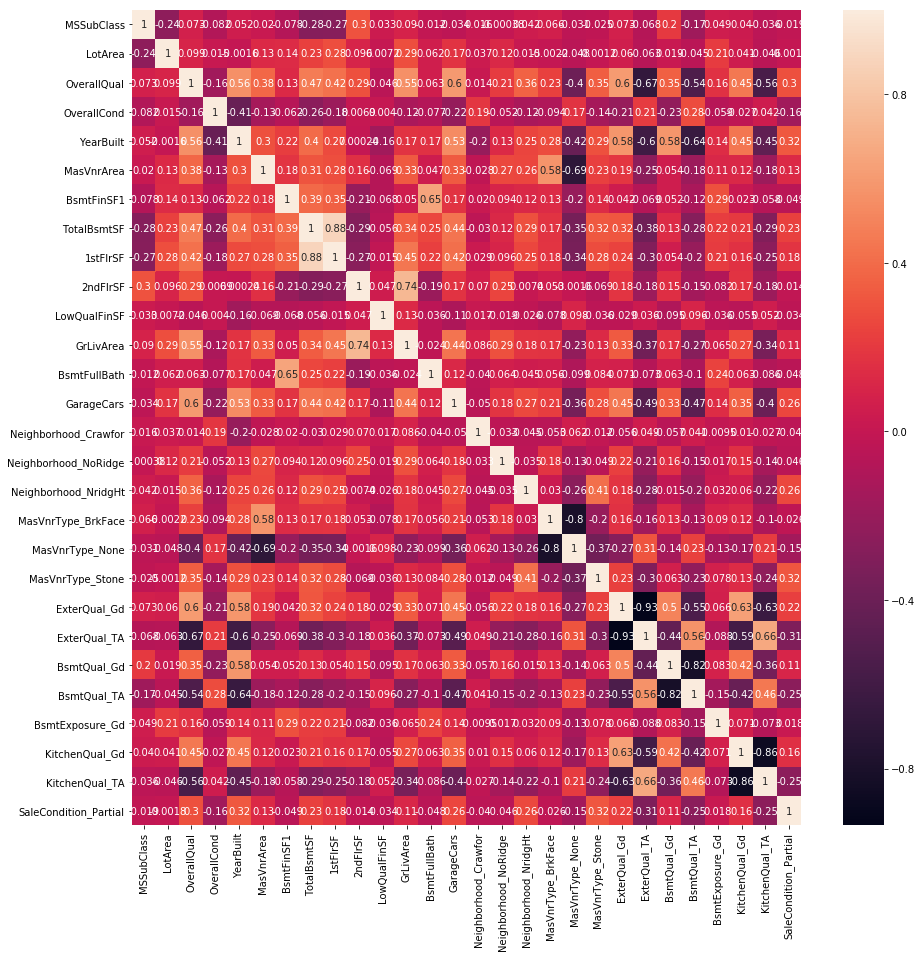

In [0]:
plt.figure(figsize=(15,15)) #plotting heatmap to check collinearity among selected features
sns.heatmap(X_train_rfe.corr(),annot=True)
plt.show()

In [0]:
X_train_rfe.shape      # dataframe after doing RFE

(1067, 28)

In [0]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [0]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060432,0.096911,0.001180,0.000061,0.001,{'alpha': 0.001},0.912334,0.875480,0.896063,0.893762,...,0.890742,0.013814,1,0.901047,0.910768,0.905834,0.903446,0.909465,0.906112,0.003627
1,0.003759,0.000244,0.001128,0.000074,0.01,{'alpha': 0.01},0.902792,0.878377,0.886666,0.889397,...,0.886206,0.010024,2,0.893955,0.905213,0.900197,0.897752,0.904428,0.900309,0.004194
2,0.002349,0.000083,0.001063,0.000020,1,{'alpha': 1.0},-0.025708,-0.001198,-0.000584,-0.000596,...,-0.010045,0.011386,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002299,0.000052,0.001102,0.000051,5,{'alpha': 5.0},-0.025708,-0.001198,-0.000584,-0.000596,...,-0.010045,0.011386,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002317,0.000057,0.001086,0.000052,10,{'alpha': 10.0},-0.025708,-0.001198,-0.000584,-0.000596,...,-0.010045,0.011386,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


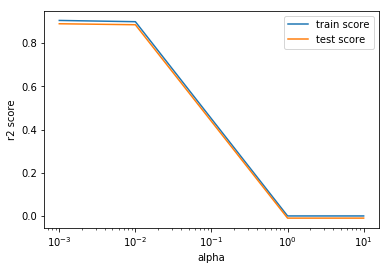

In [0]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.xscale('log')
plt.show()

In [0]:
# model with optimal alpha
# lasso regression

from sklearn import metrics


lm = Lasso(alpha=0.001) #at alpha=0.001 , we have highest train and test score
lm.fit(X_train_rfe, y_train)

X_test_rfe = X_test[col]

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9050961596520269
0.8650052668152493


Training Model accuracy --> <b>90.5 %</b>
Test Model accuracy --> <b>86%</b>

In [0]:
X_test_rfe.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleCondition_Partial'],
      dtype='object')

In [0]:
lm.coef_

array([-0.07459684,  0.09196925,  0.24380649,  0.11352113,  0.20997929,
        0.07019733,  0.08807544,  0.11719918,  0.        ,  0.04939316,
       -0.02637336,  0.31624602,  0.05636985,  0.06286489,  0.06851546,
        0.06184302,  0.07623699,  0.04480988,  0.11971719,  0.03592266,
       -0.10527828, -0.14885882, -0.0968469 , -0.08334431,  0.07621691,
       -0.08890162, -0.11091873,  0.06319392])

In [0]:
selected_features = pd.DataFrame({"Features":X_test_rfe.columns,"coeff":lm.coef_})

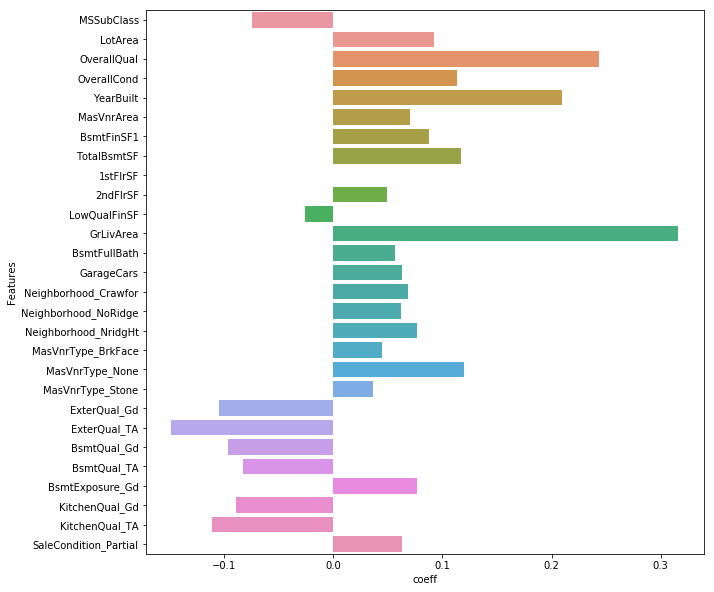

In [0]:
plt.figure(figsize=(10,10))  #plot of coefficients for the selected features
sns.barplot(x='coeff',y='Features',data=selected_features)
plt.show()

## Results

Top 5 Features which would help in deciding the price of the houses(increase/decrease) are:
    
    1.Above grade (ground) living area square feet - More the area of the living area, higher the price of the house 
    2.Rates the overall material and finish of the house- better the material used and finish of the house, higher the price
    3.Original Construction Data - the newer the house, more will be the price
    4.the quality of the material on the exterior if average/typical
    5.the quality of the kitchen if average/typical
